In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel(r"/content/Covid_Data.xlsx")

In [ ]:
df

Date                        State  Confirmed Cases  Active Cases  \
0     2020-03-27  Andaman and Nicobar Islands                1             1   
1     2020-03-28  Andaman and Nicobar Islands                6             6   
2     2020-03-29  Andaman and Nicobar Islands                9             9   
3     2020-03-30  Andaman and Nicobar Islands                9             9   
4     2020-03-31  Andaman and Nicobar Islands               10            10   
...          ...                          ...              ...           ...   
28756 2022-06-26                  West Bengal          2024479          3496   
28757 2022-06-27                  West Bengal          2024972          3777   
28758 2022-06-28                  West Bengal          2025523          4080   
28759 2022-06-29                  West Bengal          2026477          4759   
28760 2022-06-30                  West Bengal          2027901          5885   

           Cured    Death  
0            0.0      0.0  
1            0.0      0.0  
2            0.0      0.0  
3            0.0      0.0  
4            0.0      0.0  
...          ...      ...  
28756  1999767.0  21216.0  
28757  1999979.0  21216.0  
28758  2000227.0  21216.0  
28759  2000502.0  21216.0  
28760  2000798.0  21218.0  

[28761 rows x 6 columns]

In [ ]:
df.head()

Date                        State  Confirmed Cases  Active Cases  \
0 2020-03-27  Andaman and Nicobar Islands                1             1   
1 2020-03-28  Andaman and Nicobar Islands                6             6   
2 2020-03-29  Andaman and Nicobar Islands                9             9   
3 2020-03-30  Andaman and Nicobar Islands                9             9   
4 2020-03-31  Andaman and Nicobar Islands               10            10   

   Cured  Death  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0

In [ ]:
df.shape

(28761, 6)

In [ ]:
df.isnull().sum()

Date               0
State              0
Confirmed Cases    0
Active Cases       0
Cured              1
Death              1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Death'].value_counts()

Death
0.0        1754
4.0         549
1.0         520
2.0         413
129.0       361
           ... 
32788.0       1
32644.0       1
32485.0       1
32291.0       1
21218.0       1
Name: count, Length: 9344, dtype: int64

In [ ]:
df["Cured"].value_counts()

Cured
0.0          782
1.0          207
2.0           95
11350.0       93
11437.0       86
            ... 
98076.0        1
97537.0        1
96972.0        1
96392.0        1
2000798.0      1
Name: count, Length: 23654, dtype: int64

In [ ]:
df["Death"].mean()

7667.972218358832

In [ ]:
df["Death"].median()

1497.5

In [ ]:
df["Death"].fillna(df["Death"].median(),inplace=True)

In [ ]:
df["Cured"].mean()

570973.5413073713

In [ ]:
df["Cured"].median()

117999.5

In [ ]:
df["Cured"].fillna(df["Cured"].median(),inplace=True)

In [ ]:
df.isnull().sum()

Date               0
State              0
Confirmed Cases    0
Active Cases       0
Cured              0
Death              0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
state_active_cases=df.groupby("State")[["Active Cases"]].sum()

In [ ]:
state_active_cases

Active Cases
State                                                 
Andaman and Nicobar Islands                      78553
Andhra Pradesh                                22001587
Arunachal Pradesh                               663208
Assam                                          7845602
Bihar                                          6567287
Chandigarh                                      782122
Chhattisgarh                                  10943686
Dadra and Nagar Haveli and Daman and Diu        101326
Delhi                                         10865007
Goa                                            2313129
Gujarat                                       11332610
Haryana                                        7622561
Himachal Pradesh                               2570465
Jammu and Kashmir                              4956173
Jharkhand                                      3969783
Karnataka                                     46067883
Kerala                                        60837834
Ladakh                                          303709
Lakshadweep                                      94995
Madhya Pradesh                                 8712487
Maharashtra                                   90912115
Manipur                                        1509642
Meghalaya                                       907798
Mizoram                                        2378665
Nagaland                                        529179
Odisha                                        10459216
Puducherry                                     1610108
Punjab                                         6671581
Rajasthan                                     12732043
Sikkim                                          489594
State assignment pending                        347959
Tamil Nadu                                    28627946
Telangana                                      9301690
Tripura                                        1084812
Uttar Pradesh                                 19302136
Uttarakhand                                    4557304
West Bengal                                   15632643

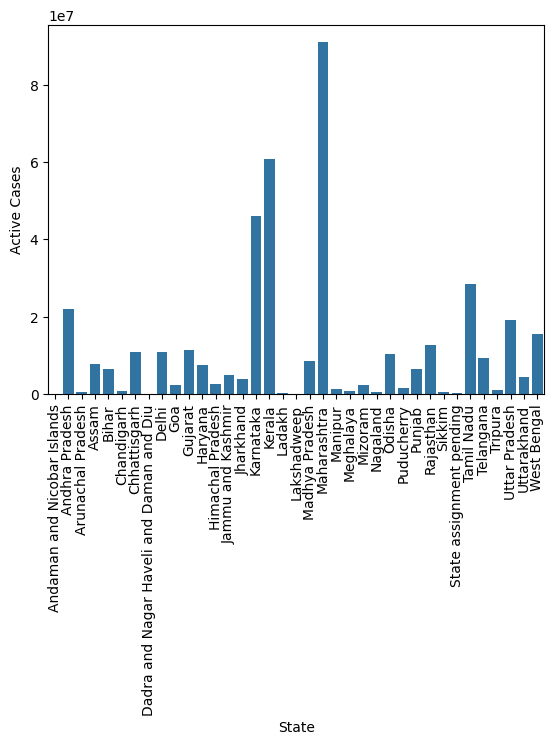

In [ ]:
sns.barplot(x="State",y="Active Cases",data=state_active_cases)
plt.xticks(rotation=90)
plt.show()

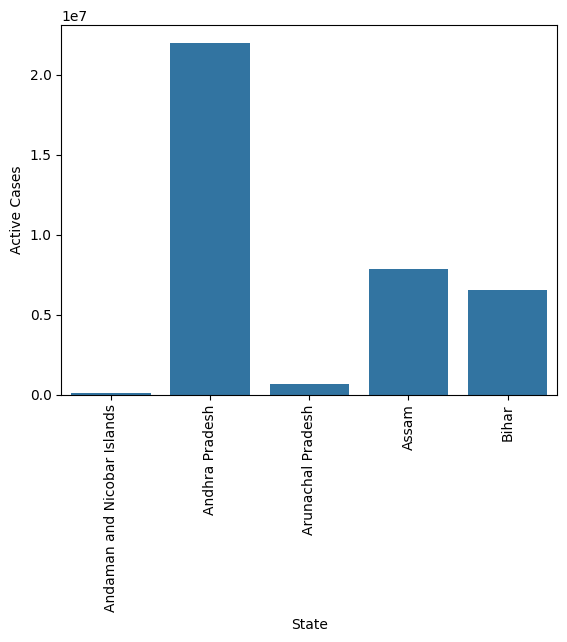

In [ ]:
sns.barplot(x="State",y="Active Cases",data=state_active_cases.head())
plt.xticks(rotation=90)
plt.show()

In [ ]:
state_death_cases=df.groupby("State")["Death"].sum()

In [ ]:
state_death_cases=state_death_cases.sort_values(ascending=False)

In [ ]:
state_death_cases

State
Maharashtra                                 66847374.0
Karnataka                                   17801862.0
Kerala                                      17050171.0
Tamil Nadu                                  17041052.0
Delhi                                       12620945.0
Uttar Pradesh                               11100241.0
West Bengal                                  9884937.0
Punjab                                       7928213.0
Andhra Pradesh                               7279421.0
Chhattisgarh                                 6215568.0
Gujarat                                      5361973.0
Madhya Pradesh                               4980715.0
Haryana                                      4588262.0
Bihar                                        4545442.0
Rajasthan                                    4249951.0
Odisha                                       3407620.0
Uttarakhand                                  3258135.0
Assam                                        2627089.0
Jhar

In [ ]:
state_death_cases = state_death_cases.to_frame()

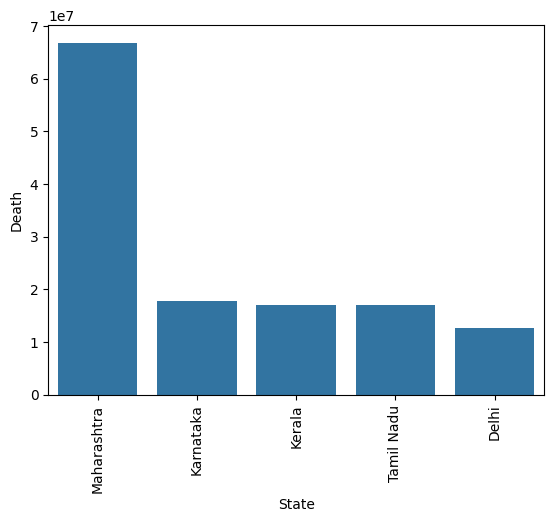

In [ ]:
sns.barplot(x="State",y="Death",data=state_death_cases.head())
plt.xticks(rotation=90)
plt.show()

In [ ]:
from datetime import datetime

In [ ]:
df["Year"]=df["Date"].dt.year

In [ ]:
yearly_deaths=df.groupby("Year")["Death"].sum()

In [ ]:
yearly_deaths

Year
1970       475507.0
2014       475759.0
2015       476006.0
2020     16879649.5
2021    113390789.0
2022     88834668.0
Name: Death, dtype: float64

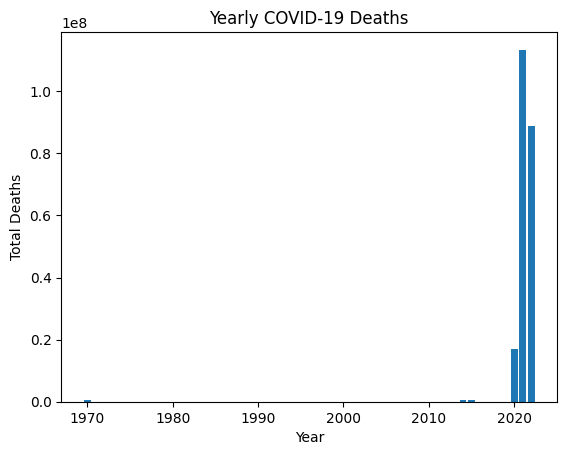

In [ ]:
plt.bar(yearly_deaths.index, yearly_deaths.values)
plt.title('Yearly COVID-19 Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()


In [ ]:
data={"Name" : ["A","B","C","D'","E"],
      "Gender" : ["F","F","F","M","M"],
      "Age" : [42,67,21,33,78],
      "Height (in cm)" : [165,187,142,198,153],
      "Weight (in kg)" : [76,42,64,87,68]}

In [ ]:
data1=pd.DataFrame(data)

In [ ]:
import random

In [ ]:
new_rows=[]

In [ ]:
for _ in range(5):
    name=''.join(random.choice('abcdefghijklmnopqrstuvwxyz'))
    gender=random.choice(["F","M"])
    age=random.randint(40,80)
    height=random.randint(150,200)
    weight=random.uniform(50,100)
    new_rows.append({'Name': name, 'Gender': gender, 'Age': age, 'Height (in cm)': height, 'Weight (in kg)': round(weight, 2)})

# Convert the list of new rows into a DataFrame
new_data = pd.DataFrame(new_rows)

# Concatenate the new DataFrame with the original one
data1 = pd.concat([data1, new_data], ignore_index=True)


In [ ]:
data1

Name Gender  Age  Height (in cm)  Weight (in kg)
0    A      F   42             165           76.00
1    B      F   67             187           42.00
2    C      F   21             142           64.00
3   D'      M   33             198           87.00
4    E      M   78             153           68.00
5    s      F   56             157           71.66
6    m      M   59             176           78.85
7    j      M   76             176           95.79
8    c      M   71             188           57.02
9    d      F   57             178           51.72